# PROYECTO FINAL CUARTO MÓDULO - BIGDATA

NICOLAS ROMERO - 20201005035
ANDRES CEPEDA  - 20191005056

# Proyecto Final: Detección y Segmentación de Objetos

En este proyecto final, entrenaremos una red convolucional para dos tareas principales:
- Detección de objetos
- Segmentación de objetos

El modelo será implementado utilizando una plataforma de bajo consumo de recursos, como TensorFlow Lite. Asegúrate de contar con los respectivos conjuntos de imágenes antes de comenzar.

## Actividades para la sesión de hoy:

### 1. Selección del dataset:
- Escoja un conjunto de imágenes, por ejemplo, de [Kaggle](https://www.kaggle.com/), con una resolución mínima de **128x128 píxeles**.
- Asegúrese de que las imágenes contengan el **objeto** que desea detectar o segmentar.
- Nota: Un mayor tamaño de las imágenes incrementará el tiempo de entrenamiento. Por lo tanto, si es necesario, reduzca su resolución.

### 2. Generación de etiquetas para detección:
- Utilice **Grounding DINO**, el cual permite localizar un objeto a partir de una entrada textual, para generar etiquetas en formato YOLO que identifiquen la ubicación del **objeto** seleccionado.

### 3. Obtención de imágenes de segmentación:
- Emplee el modelo **Segment Anything Model (SAM)** para generar máscaras de segmentación que distingan claramente entre el **objeto** y el fondo.


NOTA: es importante que se asegure que el programa se ejecute con la GPU de coolab, para ello seleecione editar->configuración del notebook->T4GPU->Guerdar

Librerias necesarias para la ejecución del programa

In [1]:
!pwd

/content


In [2]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [3]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Nov 27 17:04 .
drwxr-xr-x 1 root root 4096 Nov 27 17:03 ..
drwxr-xr-x 4 root root 4096 Nov 25 19:13 .config
drwxr-xr-x 6 root root 4096 Nov 27 17:04 GroundingDINO
drwxr-xr-x 1 root root 4096 Nov 25 19:13 sample_data


In [4]:
%cd GroundingDINO/

/content/GroundingDINO


In [5]:
!pip install -q -e .

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 19.2 MB/s eta 0:00:00


In [6]:
!pip install supervision

In [7]:
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

/content


In [8]:
%cd GroundingDINO/

/content/GroundingDINO


In [9]:
!dir

build  Dockerfile      environment.yaml  groundingdino.egg-info  README.md	   setup.py
demo   docker_test.py  groundingdino	 LICENSE		 requirements.txt  test.ipynb


In [10]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

%cd ..

model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

/content
final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [11]:
%cd GroundingDINO/

/content/GroundingDINO


In [12]:
!pip install -r requirements.txt

In [13]:
!pip install -e .

Obtaining file:///content/GroundingDINO
  Preparing metadata (setup.py) ... done
  Attempting uninstall: groundingdino
    Found existing installation: groundingdino 0.1.0
    Uninstalling groundingdino-0.1.0:
      Successfully uninstalled groundingdino-0.1.0
  Running setup.py develop for groundingdino


Cargamos la base de datos que se desea utilizar. Para este proyecto, se eligió el enfoque de una red capaz de detectar y segmentar las placas de los vehículos. Este enfoque es altamente relevante debido a sus múltiples aplicaciones en diversos sectores, especialmente en el área de gestión y control del tráfico.

In [14]:
%cd ..

# Instalar la biblioteca kaggle
!pip install kaggle

# Crear las credenciales de Kaggle directamente en el código
import os
os.environ['KAGGLE_USERNAME'] =  'nicolas2002118' # Reemplaza con tu nombre de usuario de Kaggle
os.environ['KAGGLE_KEY'] = '2a170277323b4c4fca9fb65e00824209'  # Reemplaza con tu API key de Kaggle

# Crear la carpeta donde se guardará el dataset
os.makedirs('original_images', exist_ok=True)

# Descargar el dataset usando su identificador
!kaggle datasets download -d andrewmvd/car-plate-detection -p .

# Descomprimir el archivo descargado
!unzip -o car-plate-detection.zip -d temp_images  # Descomprime en una carpeta temporal

import shutil

nombres_imagenes_deseadas = [
    "Cars0.png", "Cars1.png", "Cars101.png", "Cars102.png",
    "Cars107.png", "Cars108.png", "Cars109.png", "Cars11.png",
    "Cars110.png", "Cars111.png", "Cars112.png", "Cars113.png",
    "Cars115.png", "Cars116.png", "Cars117.png", "Cars118.png",
    "Cars12.png", "Cars120.png", "Cars123.png", "Cars129.png"
]

for filename in os.listdir("/content/temp_images/images"):
    if filename in nombres_imagenes_deseadas:  # Verifica si el nombre está en la lista deseada
        shutil.move(os.path.join('/content/temp_images/images', filename), os.path.join('/content/original_images', filename))

# Limpiar: eliminar la carpeta temporal
shutil.rmtree('/content/temp_images')
os.remove('car-plate-detection.zip')

/content
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/car-plate-detection
License(s): CC0-1.0
100% 203M/203M [00:10<00:00, 23.4MB/s]
100% 203M/203M [00:10<00:00, 21.3MB/s]
Archive:  car-plate-detection.zip
  inflating: temp_images/annotations/Cars0.xml  
  inflating: temp_images/annotations/Cars1.xml  
  inflating: temp_images/annotations/Cars10.xml  
  inflating: temp_images/annotations/Cars100.xml  
  inflating: temp_images/annotations/Cars101.xml  
  inflating: temp_images/annotations/Cars102.xml  
  inflating: temp_images/annotations/Cars103.xml  
  inflating: temp_images/annotations/Cars104.xml  
  inflating: temp_images/annotations/Cars105.xml  
  inflating: temp_images/annotations/Cars106.xml  
  inflating: temp_images/annotations/Cars107.xml  
  inflating: temp_images/annotations/Cars108.xml  
  inflating: temp_images/annotations/Cars109.xml  
  inflating: temp_images/annotations/Cars11.xml  
  inflating: temp_images/annotations/Cars110.xml  
  inflating: temp_images/

Se crea la acarpeta Images tal como se pide en las espicificaciones del proyecto, en esta carpeta se guardan las imagenes a utilizar asegurando un tamaño uniforme entre todas las imágenes.

In [15]:
!pip install opencv-python

import os
import cv2

# Ruta de la carpeta donde están las imágenes
images_folder = '/content/original_images'

# Crear una carpeta para guardar las imágenes redimensionadas
resized_folder = 'images'
os.makedirs(resized_folder, exist_ok=True)

# Redimensionar todas las imágenes en la carpeta 'images'
for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Cambia las extensiones según sea necesario
        # Leer la imagen
        img_path = os.path.join(images_folder, filename)
        img = cv2.imread(img_path)

        # Redimensionar la imagen a 500x500 píxeles
        resized_img = cv2.resize(img, (400, 300))

        # Guardar la imagen redimensionada en la nueva carpeta
        resized_img_path = os.path.join(resized_folder, filename)
        cv2.imwrite(resized_img_path, resized_img)

In [16]:
%cd ..

/


Se prueba la red Groundingdino, se obtiene la imagen con el recuadro que identifica plenamente el objeto, en este caso la placa del vehiculo.

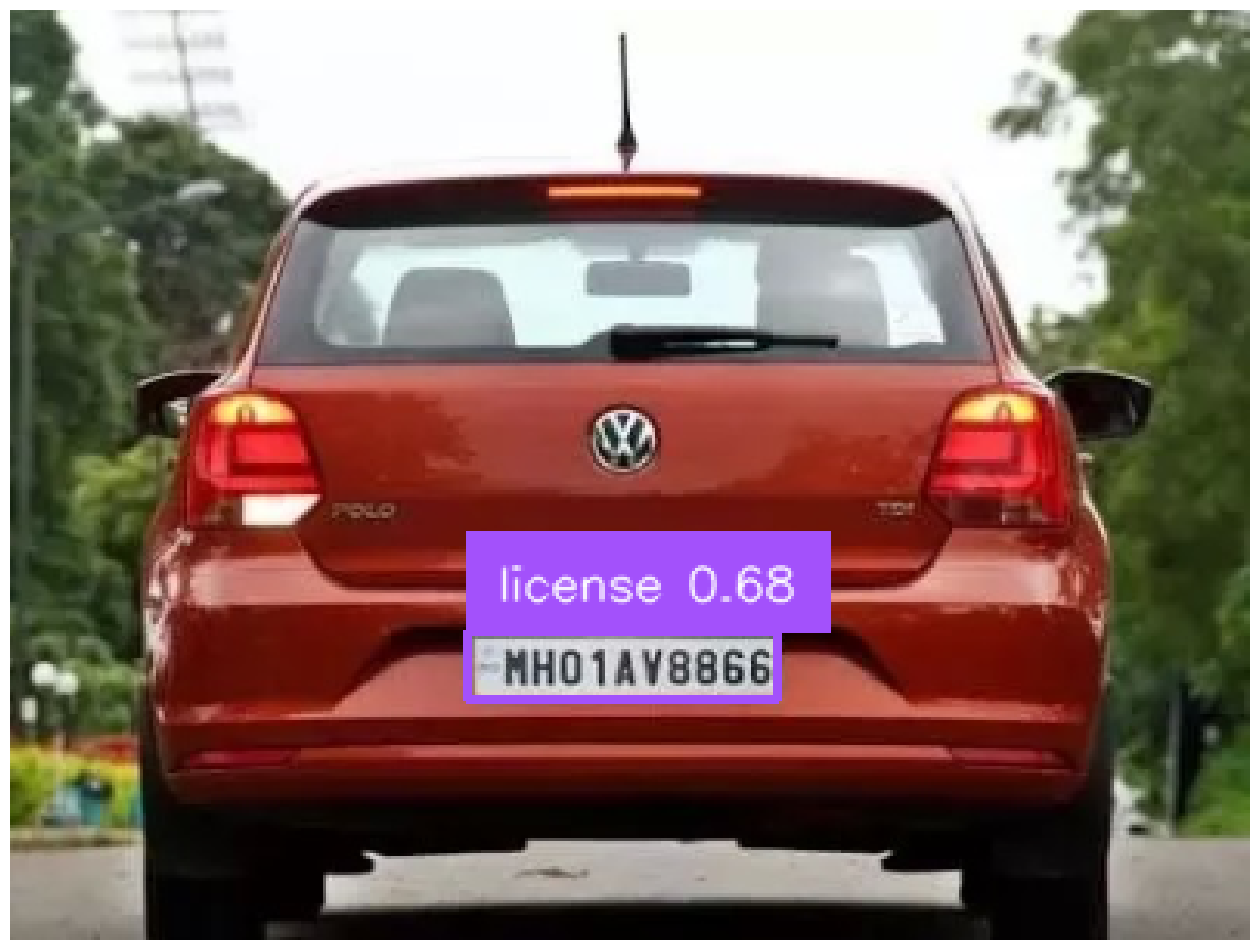

In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Cargar imagen y modelo
image_path = "/content/images/Cars108.png"
text = "license"
BOX_THRESHOLD = 0.3
TEXT_THRESHOLD = 0.50
image_source, image = load_image(image_path)

# Realizar predicciones
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=text,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device='cpu'
)

# Anotar la imagen
annotated_frame = annotate(
    image_source=image_source,
    boxes=boxes,
    logits=logits,
    phrases=phrases
)

class_id = 0  # ID de la clase

# Crear una lista para almacenar las etiquetas en formato YOLO
yolo_labels = []

# Convertir cada caja en el formato YOLO
for box in boxes:
    x_center, y_center, width, height = box.tolist()  # Convertir tensor a lista
    # Formatear la etiqueta en formato YOLO
    yolo_label = f"{class_id} {x_center} {y_center} {width} {height}"
    yolo_labels.append(yolo_label)

# Ruta del archivo de etiquetas (debe ser el mismo nombre que la imagen)
image_name = "IMG_6021-1024x657"  # Nombre de la imagen sin extensión
label_file_path = f"{image_name}.txt"

# Guardar etiquetas en archivo .txt con el mismo nombre que la imagen
with open(label_file_path, "w") as f:
    for label in yolo_labels:
        f.write(label + "\n")


# Mostrar imagen anotada
sv.plot_image(annotated_frame,(16,16))




En el codigo anterior se obtienen también lñas etiquetas tipo YOLO del objeto, esta etiqueta consta de 4 coordenadas, las dos primeras correspoden a la ubicación espacial normalizada en la imagen del centro del recuadro que identifica el objeto, las otras dos corresponden al ancho y alto del recuadro.

a continuación la etiqueta YOLO del recuadro identificado en la imagen anterior.

In [18]:
print(boxes)

tensor([[0.4943, 0.7052, 0.2497, 0.0752]])


Por último se guardan las etiquetas resultados de todas las imagenes de la base de datos en la carpeta "detection" tal como se establece en las especificaciones del problema.


In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Crear la carpeta 'detection' si no existe
os.makedirs('/content/detection', exist_ok=True)

In [20]:
import os
import cv2
import matplotlib.pyplot as plt
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Crear la carpeta 'detection' si no existe
os.makedirs('/content/detection', exist_ok=True)

# Parámetros para la detección
BOX_THRESHOLD = 0.3
TEXT_THRESHOLD = 0.50
text = "license"

# Ruta de la carpeta de imágenes
images_folder = '/content/images'

# Iterar sobre todas las imágenes en la carpeta 'images'
for image_name in os.listdir(images_folder):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):  # Cambia las extensiones según sea necesario
        image_path = os.path.join(images_folder, image_name)

        # Cargar imagen y modelo
        image_source, image = load_image(image_path)

        # Realizar predicciones
        boxes, logits, phrases = predict(
            model=model,
            image=image,
            caption=text,
            box_threshold=BOX_THRESHOLD,
            text_threshold=TEXT_THRESHOLD,
            device='cpu'
        )

        # Anotar la imagen (opcional)
        annotated_frame = annotate(
            image_source=image_source,
            boxes=boxes,
            logits=logits,
            phrases=phrases
        )

        # Leer la imagen para obtener dimensiones
        imag = cv2.imread(image_path)
        h, w, _ = imag.shape  # Obtener el alto y ancho de la imagen

        # Crear una lista para almacenar las etiquetas en formato YOLO
        yolo_labels = []

        # Convertir cada caja en el formato YOLO
        for box in boxes:
            x_center, y_center, width, height = box.tolist()  # Convertir tensor a lista

            # Asumimos que todas las detecciones son de una única clase (por ejemplo, 'license plate')
            class_id = 0  # Cambia esto según tu esquema de clases
            yolo_label = f"{class_id} {x_center} {y_center} {width} {height}"
            yolo_labels.append(yolo_label)

        # Ruta del archivo de etiquetas (debe ser el mismo nombre que la imagen)
        label_file_name = os.path.splitext(image_name)[0] + ".txt"
        label_file_path = os.path.join('/content/detection', label_file_name)

        # Guardar etiquetas en archivo .txt con el mismo nombre que la imagen
        with open(label_file_path, "w") as f:
            for label in yolo_labels:
                f.write(label + "\n")



RED SAM

Empezamos ahora con la red Sam, nuevamente hay que instalar librerias a priori para una correcta ejecución.

In [21]:
!nvidia-smi

Wed Nov 27 17:15:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /


In [23]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-cigrgze2
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-cigrgze2
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=d9f7c850914174e7081207995214e20ec07755a12608d0eb9d017bd585510cd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-1f4wt7a_/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [24]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00


In [25]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/
/weights


In [26]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/weights/sam_vit_h_4b8939.pth ; exist: True


In [27]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [28]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [29]:
mask_predictor = SamPredictor(sam)

En el siguiente ejemplo encontrará como SAM identifica el objeto solicitado obtenbiendo la máscara del objeto, en color blanco se identifica el onjeto y en color negro el fondo.

Máscara combinada guardada en: combined_mask.png


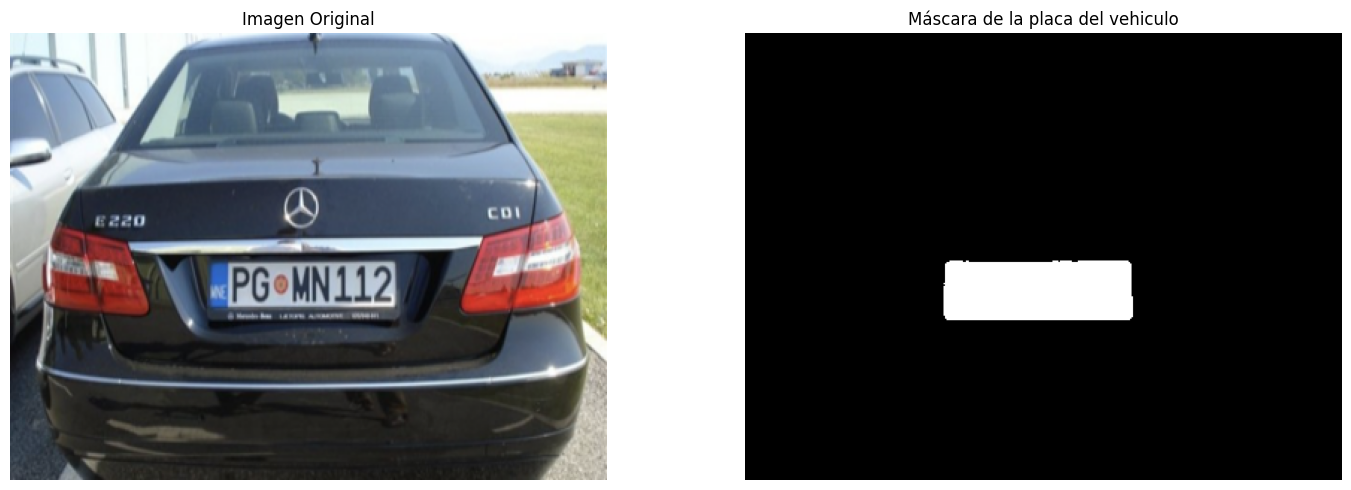

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Ruta al checkpoint de SAM (descarga previamente sam_vit_b.pth)
sam_checkpoint = "models/sam_vit_b.pth"  # Asegúrate de especificar la ruta correcta
model_type = "vit_b"

# Cargar el modelo SAM
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
sam.to("cuda")  # Cambia a "cuda" si tienes GPU disponible

# Ruta de la imagen a segmentar
image_path = "/content/images/Cars1.png"  # Cambia esto por tu imagen
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB

# Generar máscaras automáticamente
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

# Crear una máscara combinada (binaria) para guardar
combined_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
for mask in masks:
    combined_mask = np.logical_or(combined_mask, mask["segmentation"]).astype(np.uint8)

# Guardar la máscara combinada como imagen
mask_output_path = "combined_mask.png"
cv2.imwrite(mask_output_path, combined_mask * 255)  # Escalar a 0-255 para guardar como imagen
print(f"Máscara combinada guardada en: {mask_output_path}")

# Mostrar la imagen original, la máscara combinada y la segunda máscara
plt.figure(figsize=(15, 5))

# Subplot 1: Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagen Original")
plt.axis("off")


# Subplot 3: Máscara 2 (si existe)
if len(masks) > 1:  # Verificar que haya al menos dos máscaras
    second_mask = masks[4]["segmentation"]
    plt.subplot(1, 2, 2)
    plt.imshow(second_mask, cmap="gray")
    plt.title("Máscara de la placa del vehiculo")
    plt.axis("off")
else:
    print("No hay suficiente número de máscaras para mostrar la máscara 2.")

plt.tight_layout()
plt.show()


Sin embargo SAM es lo suficientemente poderosa para identificar muchas mascaras diferentes en pro de identificar otros objetos, en el siguiente ejemplo encontrá la totalidad de mascaras identificadas por SAM.

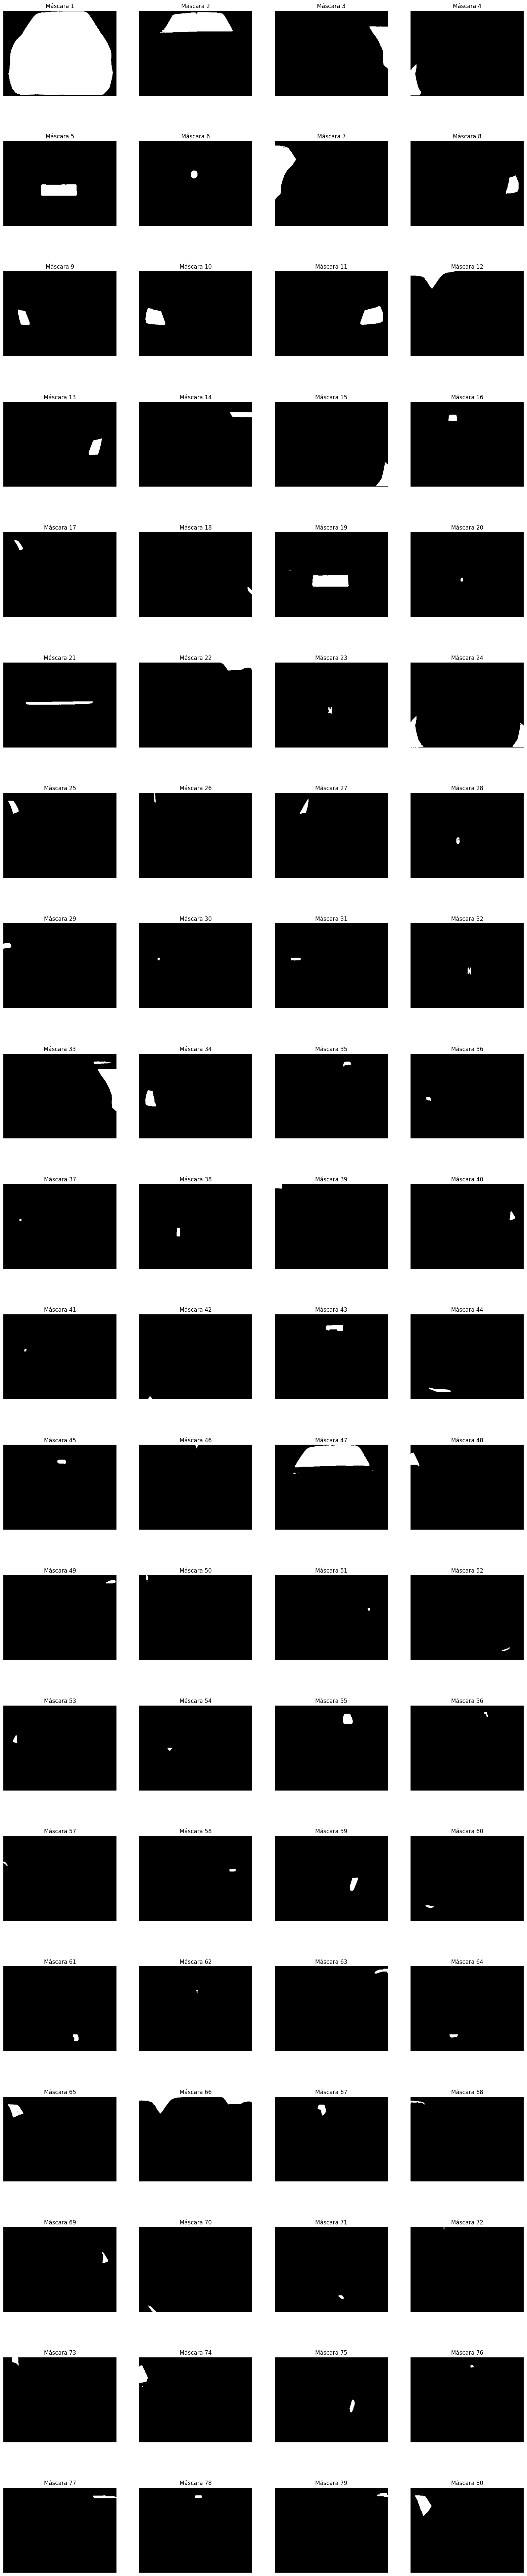

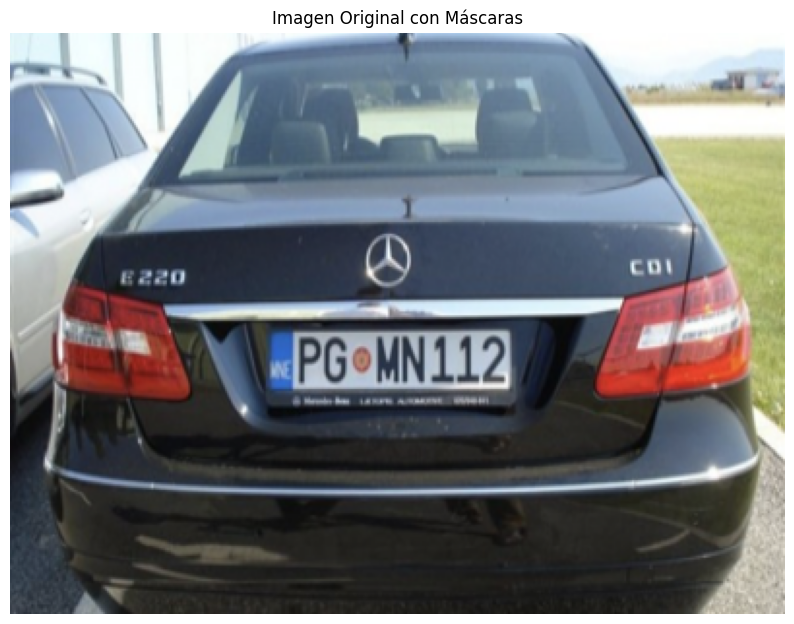

In [31]:
# Mostrar todas las máscaras individualmente en un subplot
num_masks = len(masks)
cols = 4  # Número de columnas en el grid
rows = (num_masks // cols) + (1 if num_masks % cols != 0 else 0)  # Calcular filas necesarias

plt.figure(figsize=(20, 5 * rows))  # Ajustar tamaño de la figura

for i, mask in enumerate(masks):
    plt.subplot(rows, cols, i + 1)  # Crear subplots dinámicos
    plt.imshow(mask["segmentation"], cmap="gray")  # Mostrar la máscara en escala de grises
    plt.title(f"Máscara {i + 1}")
    plt.axis("off")

# Mostrar la imagen con máscaras superpuestas
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title("Imagen Original con Máscaras")
plt.axis("off")

plt.show()


In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Ruta al checkpoint de SAM (descarga previamente sam_vit_b.pth)
sam_checkpoint = "models/sam_vit_b.pth"  # Asegúrate de especificar la ruta correcta
model_type = "vit_b"

# Cargar el modelo SAM
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
sam.to("cuda")  # Cambia a "cuda" si tienes GPU disponible

# Ruta de la carpeta de imágenes y carpeta de salida
images_folder = '/content/images'
segmentation_folder = '/content/segmentation'

# Crear la carpeta "segmentation" si no existe
os.makedirs(segmentation_folder, exist_ok=True)

# Diccionario de imágenes y máscaras deseadas
images_and_masks = {
    "Cars0.png": 5,
    "Cars1.png": 4,
    "Cars101.png": 4,
    "Cars102.png": 6,
    "Cars107.png": 2,
    "Cars108.png": 1,
    "Cars109.png": 1,
    "Cars11.png": 6,
    "Cars110.png": 8,
    "Cars111.png": 1,
    "Cars112.png": 0,
    "Cars113.png": 1,
    "Cars115.png": 5,
    "Cars116.png": 12,
    "Cars117.png": 11,
    "Cars118.png": 1,
    "Cars12.png": 0,
    "Cars120.png": 9,
    "Cars123.png": 6,
    "Cars129.png": 4
}

# Procesar cada imagen según la tabla
for image_name, mask_index in images_and_masks.items():
    image_path = os.path.join(images_folder, image_name)

    # Cargar la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB

    # Generar máscaras automáticamente con SAM
    mask_generator = SamAutomaticMaskGenerator(sam)
    masks = mask_generator.generate(image)

    # Verificar si el índice de máscara solicitado es válido
    if mask_index < len(masks):
        mask = masks[mask_index]["segmentation"]

        # Ruta para guardar la máscara específica
        mask_output_path = os.path.join(segmentation_folder, f"{os.path.splitext(image_name)[0]}_mask{mask_index}.png")

        # Guardar la máscara como imagen
        cv2.imwrite(mask_output_path, mask * 255)  # Escalar a 0-255 para guardar como imagen
        print(f"Máscara {mask_index} de {image_name} guardada en: {mask_output_path}")
    else:
        print(f"Índice de máscara {mask_index} fuera de rango para {image_name}")

# Informar que el proceso ha terminado
print("Proceso de segmentación completo. Las máscaras específicas han sido guardadas en la carpeta 'segmentation'.")


Máscara 5 de Cars0.png guardada en: /content/segmentation/Cars0_mask5.png
Máscara 4 de Cars1.png guardada en: /content/segmentation/Cars1_mask4.png
Máscara 4 de Cars101.png guardada en: /content/segmentation/Cars101_mask4.png
Máscara 6 de Cars102.png guardada en: /content/segmentation/Cars102_mask6.png
Máscara 2 de Cars107.png guardada en: /content/segmentation/Cars107_mask2.png
Máscara 1 de Cars108.png guardada en: /content/segmentation/Cars108_mask1.png
Máscara 1 de Cars109.png guardada en: /content/segmentation/Cars109_mask1.png
Máscara 6 de Cars11.png guardada en: /content/segmentation/Cars11_mask6.png
Máscara 8 de Cars110.png guardada en: /content/segmentation/Cars110_mask8.png
Máscara 1 de Cars111.png guardada en: /content/segmentation/Cars111_mask1.png
Máscara 0 de Cars112.png guardada en: /content/segmentation/Cars112_mask0.png
Máscara 1 de Cars113.png guardada en: /content/segmentation/Cars113_mask1.png
Máscara 5 de Cars115.png guardada en: /content/segmentation/Cars115_mask5.

In [36]:
import os
import zipfile
from google.colab import files

# Rutas de las carpetas a descargar
folders_to_download = ['/content/images']

# Nombre del archivo ZIP
zip_filename = 'ResultadosAndresCepeda_NicolasRomero_imagenes.zip'

# Crear un archivo ZIP que incluya todas las carpetas
with zipfile.ZipFile(zip_filename, 'w') as zipf: # Use zipfile.ZipFile directly
    for folder in folders_to_download:
        for root, _, filenames in os.walk(folder): # Iterate through files in the folder
            for filename in filenames: # Changed 'file' to 'filename' to avoid overwriting 'files' module
                zipf.write(os.path.join(root, filename),
                           os.path.relpath(os.path.join(root, filename), folder))

# Descargar el archivo ZIP
files.download(zip_filename) # This 'files' is now the module from google.colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
import os
import zipfile
from google.colab import files

# Rutas de las carpetas a descargar
folders_to_download = ['/content/detection']

# Nombre del archivo ZIP
zip_filename = 'ResultadosAndresCepeda_NicolasRomero_detection.zip'

# Crear un archivo ZIP que incluya todas las carpetas
with zipfile.ZipFile(zip_filename, 'w') as zipf: # Use zipfile.ZipFile directly
    for folder in folders_to_download:
        for root, _, filenames in os.walk(folder): # Iterate through files in the folder
            for filename in filenames: # Changed 'file' to 'filename' to avoid overwriting 'files' module
                zipf.write(os.path.join(root, filename),
                           os.path.relpath(os.path.join(root, filename), folder))

# Descargar el archivo ZIP
files.download(zip_filename) # This 'files' is now the module from google.colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import os
import zipfile
from google.colab import files

# Rutas de las carpetas a descargar
folders_to_download = ['/content/segmentation']

# Nombre del archivo ZIP
zip_filename = 'ResultadosAndresCepeda_NicolasRomero_segmentation.zip'

# Crear un archivo ZIP que incluya todas las carpetas
with zipfile.ZipFile(zip_filename, 'w') as zipf: # Use zipfile.ZipFile directly
    for folder in folders_to_download:
        for root, _, filenames in os.walk(folder): # Iterate through files in the folder
            for filename in filenames: # Changed 'file' to 'filename' to avoid overwriting 'files' module
                zipf.write(os.path.join(root, filename),
                           os.path.relpath(os.path.join(root, filename), folder))

# Descargar el archivo ZIP
files.download(zip_filename) # This 'files' is now the module from google.colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>